# Data Analysis and Preprocessing

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

* Load Datasets

In [21]:
fraud_data = pd.read_csv('../assets/Data/Fraud_Data.csv')
ip_to_country = pd.read_csv('../assets/Data/IpAddress_to_Country.csv')

In [22]:
print(fraud_data['ip_address'].isnull().sum())

0


* Handle Missing Values

In [23]:
fraud_data.fillna({'age': fraud_data['age'].median(), 'browser': 'Unknown'}, inplace=True)

* Data Cleaning

In [24]:
fraud_data.drop_duplicates(inplace=True)
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

* Exploratory Data Analysis

In [26]:
print("Dataset Info:")
print(fraud_data.info())
print("\nSummary Statistics:")
print(fraud_data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 151112 non-null  int64         
 1   signup_time             151112 non-null  datetime64[ns]
 2   purchase_time           151112 non-null  datetime64[ns]
 3   purchase_value          151112 non-null  int64         
 4   device_id               151112 non-null  object        
 5   source                  151112 non-null  object        
 6   browser                 151112 non-null  object        
 7   sex                     151112 non-null  object        
 8   age                     151112 non-null  int64         
 9   ip_address              151112 non-null  int64         
 10  class                   151112 non-null  int64         
 11  lower_bound_ip_address  151112 non-null  int64         
 12  upper_bound_ip_a

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_9758/3487713597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=fraud_data, palette='Set2')


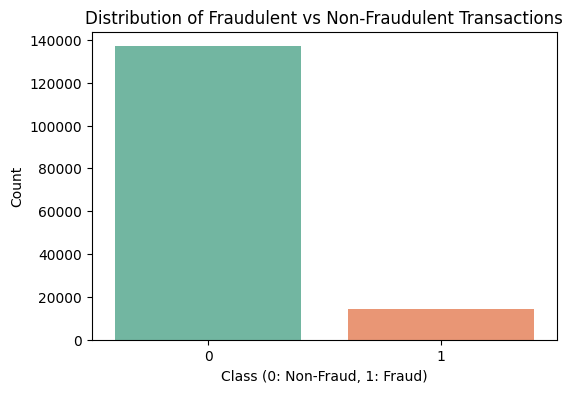

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=fraud_data, palette='Set2')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

* Univariate Analysis: Numerical Features

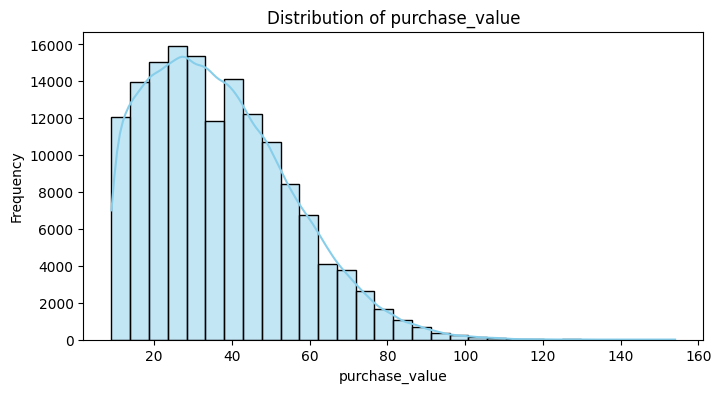

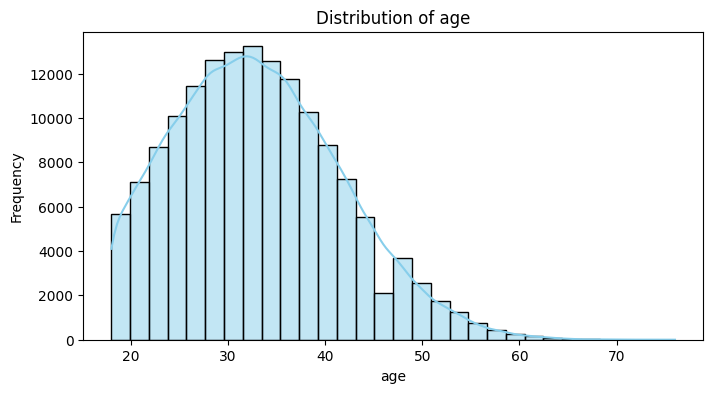

In [33]:
numerical_features = ['purchase_value', 'age']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(fraud_data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

* Univariate Analysis: Categorical Features

/tmp/ipykernel_9758/3990954176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_data, palette='Set3')


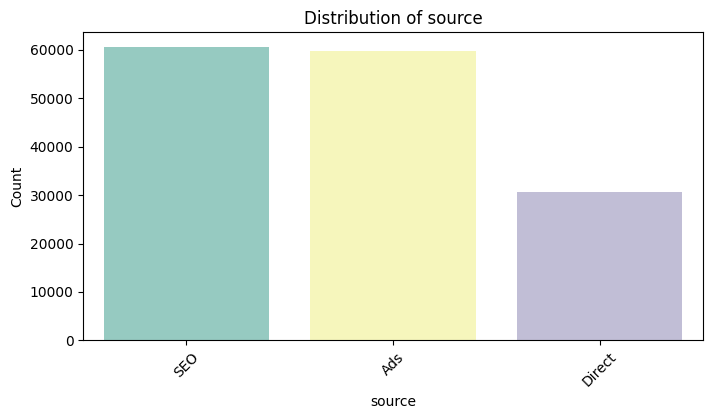

/tmp/ipykernel_9758/3990954176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_data, palette='Set3')


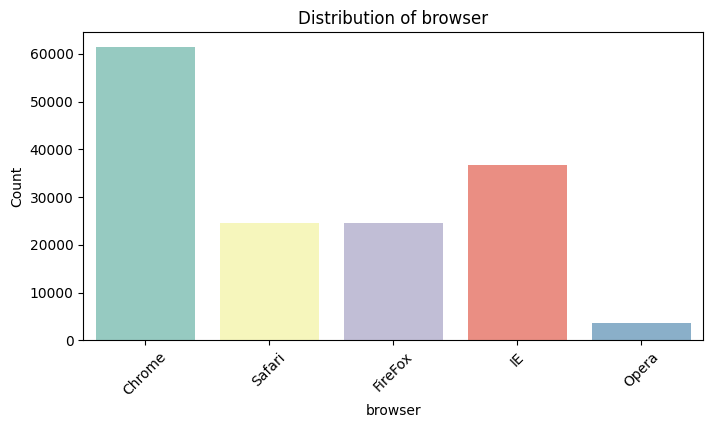

/tmp/ipykernel_9758/3990954176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_data, palette='Set3')


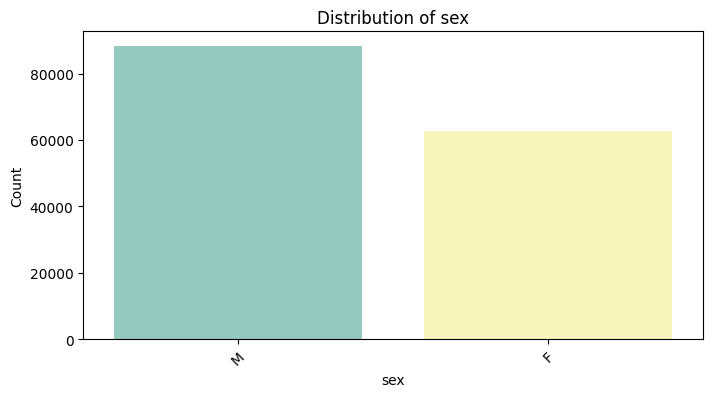

In [34]:
categorical_features = ['source', 'browser', 'sex']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=fraud_data, palette='Set3')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

* Bivariate Analysis: Relationship between features and target variable


/tmp/ipykernel_9758/3263464757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=fraud_data, palette='Set2')


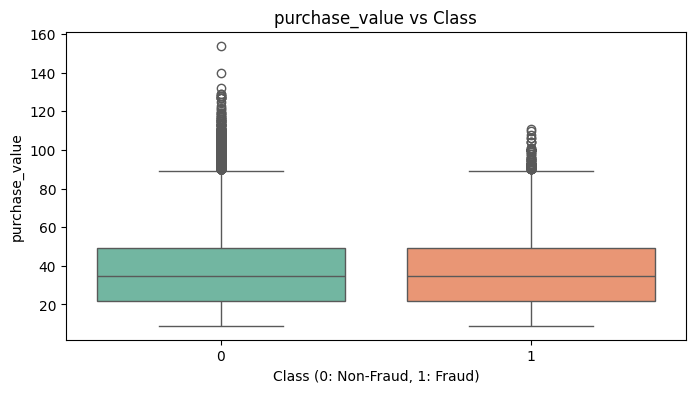

/tmp/ipykernel_9758/3263464757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=fraud_data, palette='Set2')


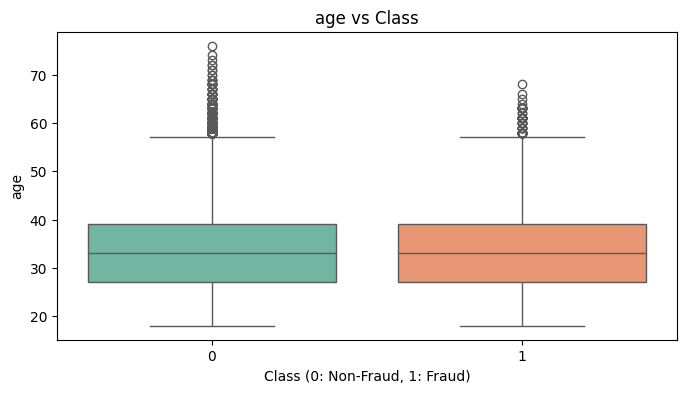

In [35]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=feature, data=fraud_data, palette='Set2')
    plt.title(f'{feature} vs Class')
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel(feature)
    plt.show()

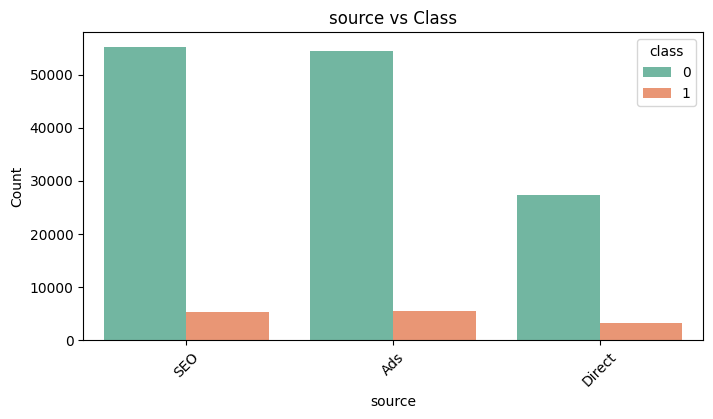

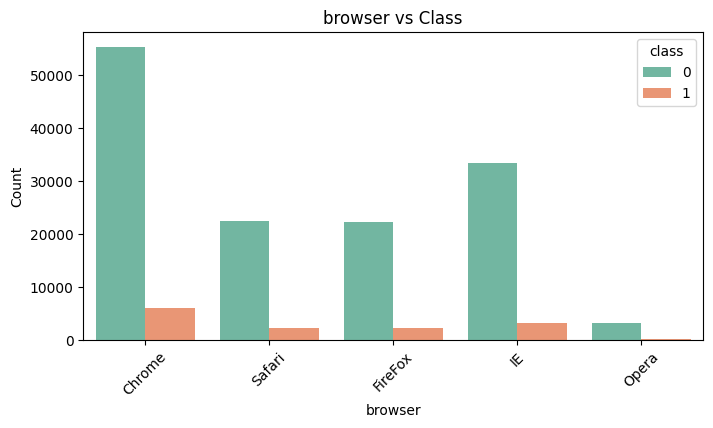

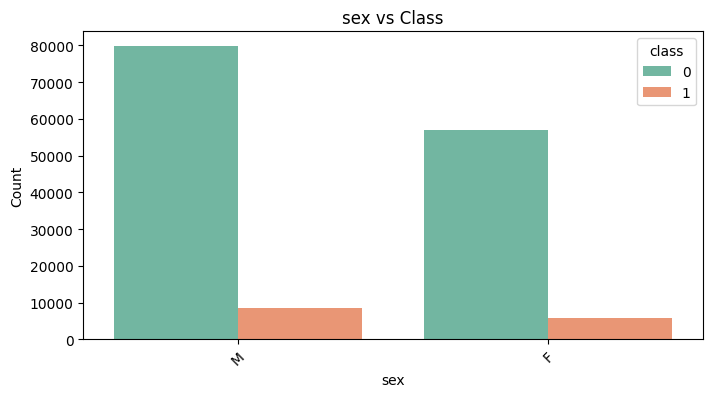

In [36]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='class', data=fraud_data, palette='Set2')
    plt.title(f'{feature} vs Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

* Correlation Analysis (for numerical features)

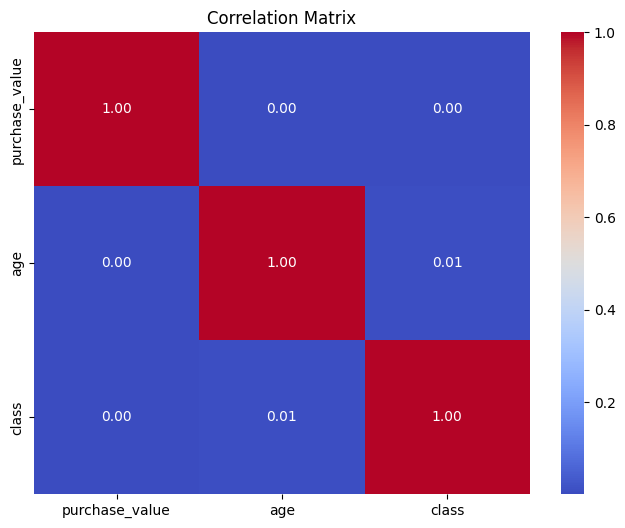

In [37]:
correlation_matrix = fraud_data[numerical_features + ['class']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* Convert IP addresses to integer format

In [25]:

fraud_data['ip_address'] = fraud_data['ip_address'].apply(lambda x: int(str(x).replace('.', '')))
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].apply(lambda x: int(str(x).replace('.', '')))
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].apply(lambda x: int(str(x).replace('.', '')))

fraud_data = pd.merge_asof(fraud_data.sort_values('ip_address'), 
                           ip_to_country.sort_values('lower_bound_ip_address'), 
                           left_on='ip_address', 
                           right_on='lower_bound_ip_address')


* Feature Engineering

In [38]:
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek


* Normalization and Scaling

In [39]:
scaler = StandardScaler()
fraud_data[['purchase_value', 'age']] = scaler.fit_transform(fraud_data[['purchase_value', 'age']])


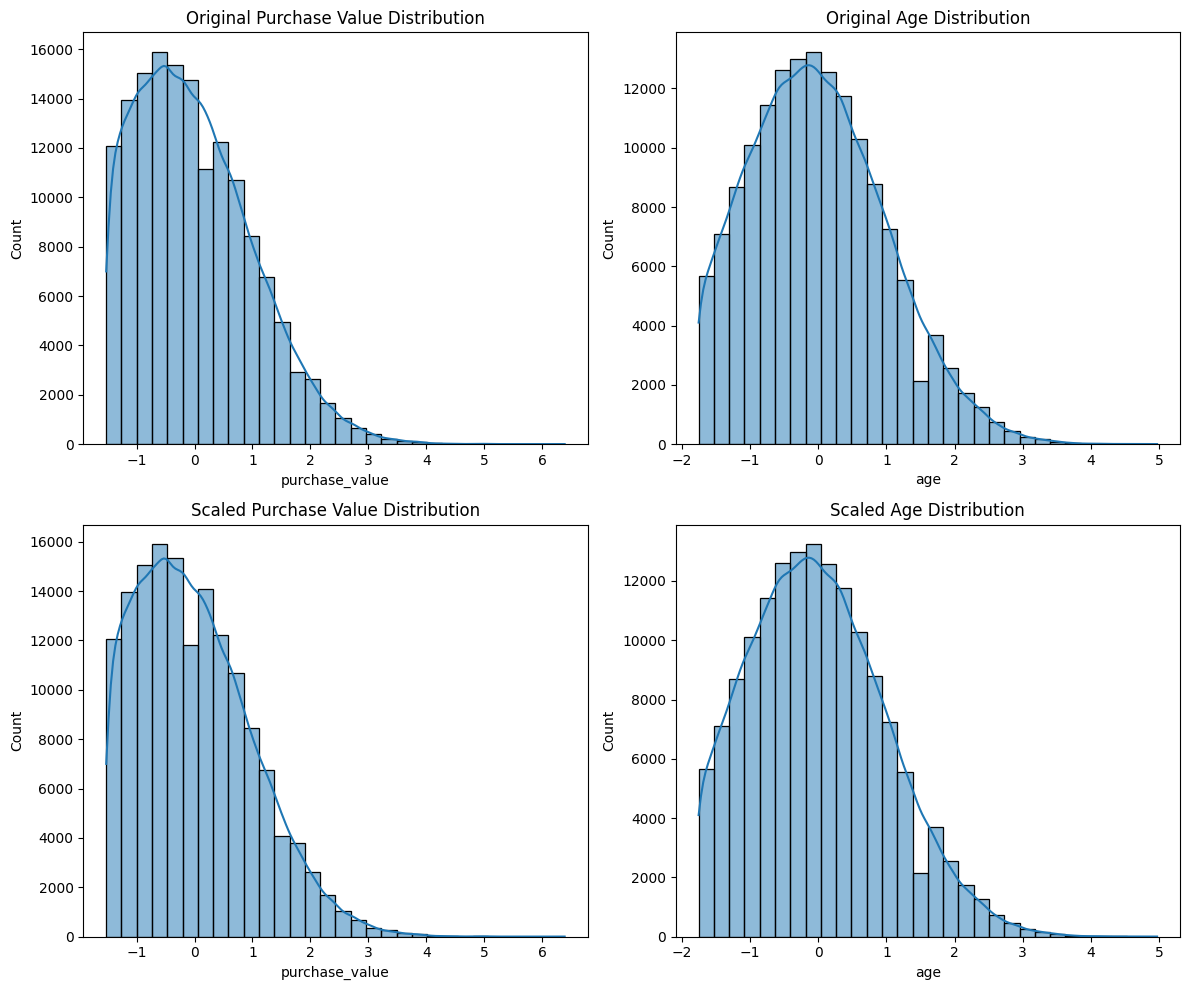

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.histplot(fraud_data['purchase_value'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Purchase Value Distribution')

sns.histplot(fraud_data['age'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Original Age Distribution')

# Apply scaling
scaler = StandardScaler()
fraud_data[['purchase_value', 'age']] = scaler.fit_transform(fraud_data[['purchase_value', 'age']])

# Scaled data visualization
sns.histplot(fraud_data['purchase_value'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Scaled Purchase Value Distribution')

sns.histplot(fraud_data['age'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Scaled Age Distribution')

plt.tight_layout()
plt.show()

* Encode Categorical Features

In [41]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(fraud_data[['source', 'browser', 'sex']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['source', 'browser', 'sex']))
fraud_data = pd.concat([fraud_data, encoded_df], axis=1)

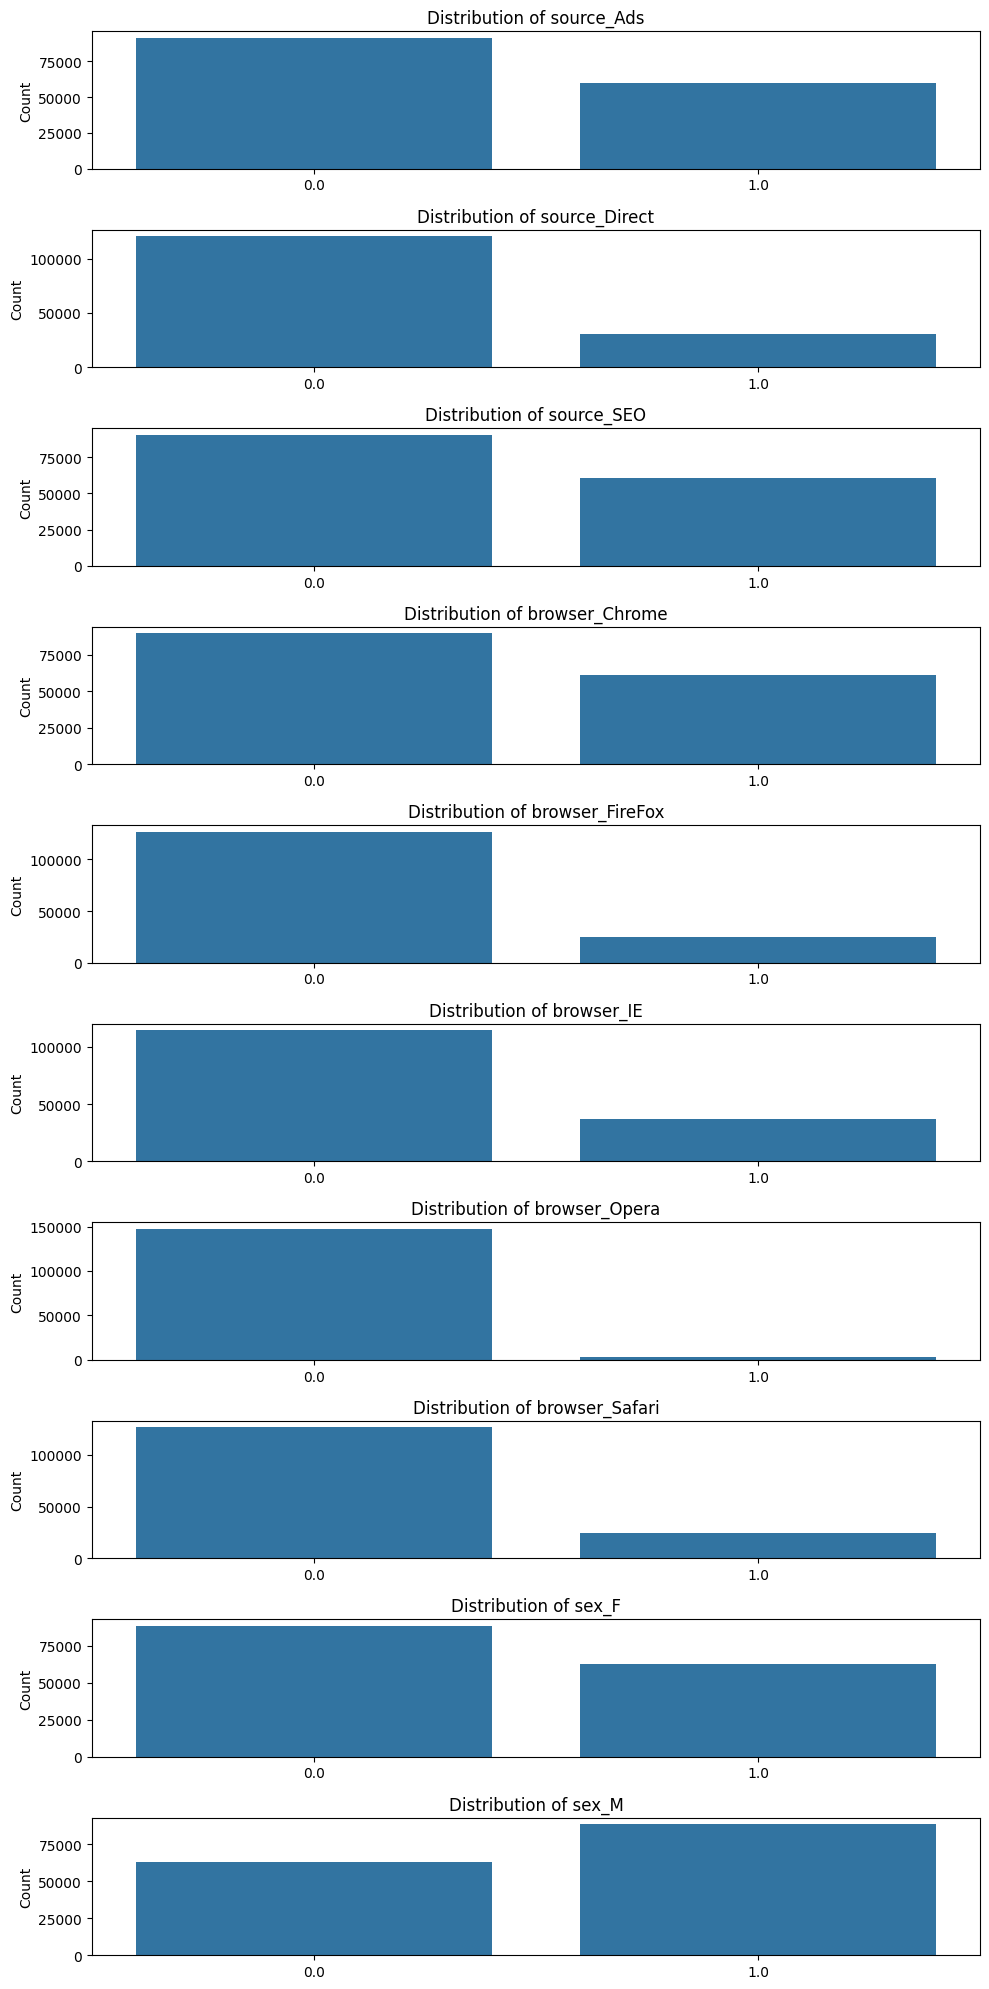

In [42]:
encoded_columns = encoder.get_feature_names_out(['source', 'browser', 'sex'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Plot each encoded feature
fig, axes = plt.subplots(nrows=len(encoded_columns), ncols=1, figsize=(10, 20))
for i, column in enumerate(encoded_columns):
    sns.countplot(data=encoded_df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [43]:
print(fraud_data.head())

   user_id         signup_time       purchase_time  purchase_value  \
0   100422 2015-01-27 03:37:33 2015-04-05 08:37:33        0.931338   
1   166512 2015-05-09 02:05:50 2015-08-25 10:38:34       -0.760552   
2   150173 2015-04-07 10:15:08 2015-05-16 01:25:27       -0.978861   
3    12875 2015-06-10 15:49:18 2015-08-16 21:37:50       -1.197169   
4   306455 2015-04-19 10:26:33 2015-07-12 22:07:27        0.494721   

       device_id source  browser sex       age   ip_address  ...  source_Ads  \
0  BBSBWLWHDICIU    SEO   Chrome   M -1.640890   6303068027  ...         0.0   
1  VOGAPYOZKNQTA    Ads   Chrome   M  0.099713  10376445278  ...         1.0   
2  OYZMXINLSCJDT    SEO   Safari   F  0.447833  14865400337  ...         0.0   
3  FUIURAMFIJFDH    Ads  FireFox   M -1.756930  19094778367  ...         1.0   
4  MLEZYGFSCMJMW    SEO   Safari   F -1.176729  20783221802  ...         0.0   

   source_Direct  source_SEO browser_Chrome  browser_FireFox  browser_IE  \
0            0.0      